# Hate-spreading Twitter Accounts Detector

In [ ]:
   reddit = praw.Reddit(
        client_id='uMDtYdkzqU6OEw5tqzNQBQ',
        client_secret='**********************************',
        redirect_uri='http://localhost:8080',
        user_agent='app123/1.0 by /u/Ok-Guess7756'
    )
# https://www.reddit.com/prefs/apps
# https://support.reddithelp.com/hc/en-us/articles/19696541895316-Available-search-features

In [ ]:
# !pip install TextBlob
import praw
from textblob import TextBlob
import datetime
import pandas as pd
import time

## Extracting data from Reddit: using PRAW- (Python Reddit API Wrapper)

### Subreddit doc:

https://praw.readthedocs.io/en/stable/code_overview/models/subreddit.html

### Submission doc:

https://praw.readthedocs.io/en/stable/code_overview/models/submission.html#praw.models.Submission

In [ ]:
# Iterate through submissions in the subreddit
for submission in subreddit.search(query='slur',sort='comments', limit=200):
    print(submission.title)

In [ ]:
Subreddit_list: ['israelpalestine','MensRights','cocaine','israelcrimes']
words_to_search=['slur','nigger','ni***','kike','Cocksucker','fucking',"dirty","sand monkey","pig","trumpster",
                 "slut","f@&&0t","tr@nny","dyke","groomer","fag","faggot","towelhead","twat",
                 "terrorist","whitetrash","whore","nazi","jewish","zionist","bolsominion","terrorist","on x","libs of tik tok",
                 "transphobia","Misogyny|Misogynist",
                 "twitter conduct","weird twitter account","hateful twitter account","twitter conduct"]

In [ ]:
data = {'Text': [], 'Regex Matches': [], 'Query Word': [], 'Upvotes': [], 'Downvotes': [], 'Type': []}
df = pd.DataFrame(data)
df

In [ ]:
import pandas as pd
import re
import praw
import time

def scrape_reddit_data(subreddits, queries, limit, sort, time_filter):
    data = {'Text': [], 'Regex Matches': [], 'Query Word': [], 'Upvotes': [], 'Downvotes': [], 'Type': []}

    for sub_name in subreddits:
        subreddit = reddit.subreddit(sub_name)
        print(f"Scraping data from r/{sub_name}...")

        for query in queries:
            print(query)
            data = process_submissions(subreddit, query, limit, sort, time_filter, data)

    print("Finished scraping data.")
    return data

def process_submissions(subreddit, query, limit, sort, time_filter, data):
    TWITTER_REGEX = r'https://twitter.com/\S+|https://x.com/\S+|@\S+|handle|account|twitter|on x'
    USERNAME_REGEX = r'https://twitter.com/\S+|https://x.com/\S+|\b@\S+'

    with open('files/comments_file.txt', 'a', encoding='utf-8') as comments_file:
        comments_file.write('new_loop\n')
        time.sleep(1)

        for submission in subreddit.search(query=query, sort=sort, limit=limit, time_filter=time_filter):
            submission.comments.replace_more(limit=None)
            submission_text = submission.title + "\n" + submission.selftext if submission.selftext else submission.title

            try:
                if re.search(TWITTER_REGEX, submission_text):
                    update_data(data, submission_text, query, submission.score, submission.downs, 'Submission')
                    comments_file.write(submission_text)

                for comment in submission.comments.list():
                    time.sleep(2)
                    print("Sleeping...")

                    if isinstance(comment, praw.models.Comment) and re.search(TWITTER_REGEX, comment.body):
                        update_data(data, comment.body, query, comment.score, comment.downs, 'Comment')
                        comments_file.write(comment.body)
            except Exception as e:
                print(f"An error occurred: {e}")

    return data

def update_data(data, text, query, upvotes, downvotes, type_):
    USERNAME_REGEX = r'https://twitter.com/\S+|https://x.com/\S+|\b@\S+'
    data['Text'].append(text)
    data['Query Word'].append(query)
    data['Upvotes'].append(upvotes)
    data['Downvotes'].append(downvotes)
    data['Type'].append(type_)

    matches = re.findall(USERNAME_REGEX, text)
    data['Regex Matches'].append('\n'.join(matches) if matches else '')

    new_row = {'Text': text, 'Query Word': query, 'Upvotes': upvotes, 'Downvotes': downvotes, 'Type': type_, 'Regex Matches': '\n'.join(matches) if matches else ''}
    df = pd.DataFrame(data)
    df = df.append(new_row, ignore_index=True)
    df.to_csv('inloop_reddit_matches.csv', index=False)

# Usage example:
# scrape_reddit_data(['python'], ['data science'], 10, 'new', 'day')


In [ ]:
subreddits = ['all+againsthatesubreddits']
queries = ["weird twitter account","hateful twitter account","twitter conduct"]
limit = 1
sort = 'top'
time_filter = 'month'
data = scrape_reddit_data(subreddits, queries, limit,sort,time_filter,df)
new_df = pd.DataFrame(data)
frames = [df, new_df]
df = pd.concat(frames,ignore_index=True

In [ ]:
df.to_csv('reddit_matches.csv', index=False)

In [ ]:
combined_string = ' '.join(df['column_name'])

# Part II : Twitter Data
### Collecting data about the  suspicious accounts

In [ ]:
import re

def extract_twitter_handles_from_file(file_path):
    twitter_handles = []

    # Define regular expression patterns
    twitter_url_regex = r'https?://(?:www\.)?twitter\.com/([a-zA-Z0-9_]+)'
    x_url_regex  = r'https?://(?:www\.)?x\.com/([a-zA-Z0-9_]+)'
    twitter_username_regex = r'@([a-zA-Z0-9_]+)'

    # Compile regex patterns
    twitter_url_pattern = re.compile(twitter_url_regex)
    twitter_username_pattern = re.compile(twitter_username_regex)
    x_username_pattern = re.compile(x_url_regex)


    # Open the file and read line by line
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Find Twitter URLs and extract handles
            twitter_urls = twitter_url_pattern.findall(line)
            for url in twitter_urls:
                twitter_handles.append(url)

            # Find Twitter usernames and extract handles
            twitter_usernames = twitter_username_pattern.findall(line)
            for username in twitter_usernames:
                twitter_handles.append(username)

            x_usernames = x_username_pattern.findall(line)
            for username in x_usernames:
                twitter_handles.append(username)
    # No mistaken @
    filtered_handles = [handle for handle in twitter_handles if len(handle) > 3]
    # Remove duplicates
    unique_handles = list(set(filtered_handles))
    return unique_handles

# Example usage:
file_path = 'files/comments_file.txt'
twitter_handles = extract_twitter_handles_from_file(file_path)
print(len(twitter_handles))

In [ ]:
(unique_handles

#### imports & tokens
## https://rapidapi.com/Glavier/api/twitter135
# hate tweets dataset:
# https://github.com/albanyan/counterhate_reply/blob/main/Data/dataset.csv
# https://twitter.com/gregorysaicido?lang=en

In [ ]:

from IPython.display import JSON
import requests
import json

In [ ]:
base_url = "https://twitter135.p.rapidapi.com/"
headers = {
	"X-RapidAPI-Key": "******************************************",
	"X-RapidAPI-Host": "twitter135.p.rapidapi.com"
}

#### get user info by name

In [ ]:
def get_user_info_by_name(user_name):
    """
    input: User Name
    output: User ID, followers count, following count, description, total tweets, is_verified,
    """
    info_dict = {}
    url = base_url + "UserByScreenName/"
    querystring = {"username": user_name}
    response = requests.get(url, headers=headers, params=querystring)
    data = response.json().get('data', {}).get('user', {}).get('result', {})
    rest_id = data.get('rest_id')
    if rest_id is None:
        error_message = data.get('message', 'No message provided')
        raise ValueError(f"Failed to retrieve rest_id: {error_message}")
    user_data = data.get('legacy', {})
    info_dict = {
        "followers_num": user_data.get('followers_count', 0),
        "following_num": user_data.get('friends_count', 0),
        "description": user_data.get('description', ''),
        "possibly_sensitive": user_data.get('possibly_sensitive', False),
        "statuses_count": user_data.get('statuses_count', 0),
        "is_verified": user_data.get('verified', False),
        "total_likes": user_data.get('favourites_count', 0),
        "rest_id": rest_id
    }
    return info_dict


#### tweets data

In [ ]:
def get_tweet_info(user_id):
    """Extracts relevant information from tweet entries in the given response JSON object.
    Args:
        response_json: The response JSON object obtained from an API call.
    Returns:
        A list of dictionaries containing information about each tweet.
    """
    tweet_info_list = []
    url = base_url + "UserTweets/"
    querystring = {"id": user_id}
    response = requests.get(url, headers=headers, params=querystring)
    print(user_id)
    try:
        if 'user' not in response.json()['data'] or 'result' not in response.json()['data']['user']:
            return tweet_info_list  # Return empty list if 'user' or 'result' is missing

        for instruction in response.json()['data']['user']['result']['timeline']['timeline']['instructions']:
            if instruction['type'] == 'TimelineAddEntries':
                for entry in instruction['entries']:
                    content = entry['content']
                    if content['entryType'] == 'TimelineTimelineItem' and content['itemContent']['itemType'] == 'TimelineTweet':
                        tweet_results = content['itemContent']['tweet_results']
                        if 'result' in tweet_results:
                            tweet = tweet_results['result']
                            if tweet['__typename'] == 'Tweet' and 'legacy' in tweet:
                                tweet_info = {
                                    'full_text': tweet['legacy']['full_text'],
                                    'id': tweet['legacy']['id_str'],  # Using id_str for consistency
                                    'likes': tweet['legacy']['favorite_count'],
                                    'replies': tweet['legacy']['reply_count'],
                                    'possibly_sensitive': tweet['legacy'].get('possibly_sensitive', False),  # Handle potential missing key
                                    'created_at': tweet['legacy']['created_at']
                                }
                                if 'retweeted_status_result' in tweet['legacy']:
                                    tweet_info['tweet_type'] = 'Retweet'
                                else:
                                    tweet_info['tweet_type'] = 'Original'
                                tweet_info_list.append(tweet_info)

    except Exception as e:
        print(f"An error occurred: {e}")
        return tweet_info_list  # Return empty list if an error occurs

    return tweet_info_list


In [ ]:
get_tweet_info("148313727")

148313727


[{'full_text': "RT @rightstuffgal: Calling all #Patriots. I'm 91 away from hitting 4k followers on my account after Twitter canceled me. Please follow me.…",
  'id': '1776038171257540791',
  'likes': 0,
  'replies': 0,
  'possibly_sensitive': False,
  'created_at': 'Fri Apr 05 00:04:31 +0000 2024',
  'tweet_type': 'Retweet'},
 {'full_text': 'RT @rightstuffgal: "I Can\'t Vote For Trump - He\'s Crazy!" Watch Right Stuff gals react to people who say they just can\'t vote for #donaldtr…',
  'id': '1764334461036929210',
  'likes': 0,
  'replies': 0,
  'possibly_sensitive': False,
  'created_at': 'Sun Mar 03 16:58:09 +0000 2024',
  'tweet_type': 'Retweet'},
 {'full_text': 'RT @rightstuffgal: In a #crazy, upside down world - #DonaldTrump is the right choice for #President #UnitedConservatives https://t.co/6nxwP…',
  'id': '1761866764873351183',
  'likes': 0,
  'replies': 0,
  'possibly_sensitive': False,
  'created_at': 'Sun Feb 25 21:32:25 +0000 2024',
  'tweet_type': 'Retweet'},
 {'full_tex

In [ ]:
url = base_url+ "UserTweets/"
querystring = {"id":'47530761'}
response = requests.get(url, headers=headers, params=querystring)
JSON(response.json())

<IPython.core.display.JSON object>

#### get replies data

In [ ]:
def extract_replies_text(user_id):
    """
    input: a user_rest_id and a json response of /UserTweetsAndReplies/ endpoint for this id,
    output: a list of all the replies of the user, with the user ID he replied to. tuple - (text, user ID)
    """
    url = base_url + "v2/UserTweetsAndReplies/"
    querystring = {"id": user_id, "count": "100"}
    response = requests.get(url, headers=headers, params=querystring)
    replies = []

    try:
        if 'user' not in response.json()['data'] or 'result' not in response.json()['data']['user']:
            return replies  # Return empty list if 'user' or 'result' is missing

        for entry in response.json()['data']['user']['result']['timeline_v2']['timeline']['instructions']:
            if entry.get("type") == "TimelineAddEntries":
                for item in entry.get("entries", []):
                    tweet_content = item.get("content", {})
                    for x in tweet_content.get("items", []):
                        tweet_results = x.get("item", {}).get("itemContent", {}).get("tweet_results", {}).get("result", {})
                        if tweet_results.get('tweet') is not None:
                            tweet_results = tweet_results['tweet']
                        if tweet_results.get('legacy') is not None:
                            tweet_results = tweet_results['legacy']
                            if tweet_results.get("user_id_str") == user_id:
                                reply_text = tweet_results['full_text']
                                reply_user_id = tweet_results.get('in_reply_to_user_id_str', None)
                                replies.append((reply_text, reply_user_id))
    except Exception as e:
        print(f"An error occurred: {e}")
        return replies

    return replies


In [ ]:
url = base_url+ "v2/UserTweetsAndReplies/"
querystring = {"id" : "233294073"}
response = requests.get(url, headers=headers, params=querystring)
JSON(response.json())

<IPython.core.display.JSON object>

In [ ]:

# Example usage (assuming 'data' is your JSON data as shown above):
userID = '1372511389764481024'
replies = extract_replies_text(userID)
for x in replies:
    print(x)

('@zongago98 מחכה בציפייה גדולה', '1638824591207350272')
('@zongago98 @swly22671849 תמיד מלך', '1638824591207350272')
('@micha_schachat ריגשת', '211180250')
('@micha_schachat יש מבצעים ב11.11', '211180250')
('@LipschitzYaacov וואלה ריגשת', '998532970414788609')
('@micha_schachat @dorhoffman @Josifoon @GuyVaknin @Melikson24 נעשה חילוף על הספר של מליקסון ואחפש מחר באפטר את השני שלו', '211180250')
('@inbarmarko @AdiMarkoo דרייפיט ככה שהחולצת ב לא מזיעה, אפילו לא מאמינים פה מסתובבים עם ציצית בחצי ב', '1648040705682558976')
('@micha_schachat כמה מובכים הולכים להיות הלוחמים שהולכים לחזור מהלחימה ושלחו הודעת פרידה לאקסית', '211180250')
('@boazmatitya זה הרעל \nהרבה זמן עבר מצוק איתן', '1584520402314878979')
('@inbarmarko @yaelle_shap בנות מהישוב שאנחנו שומרים חשבו שאני בסדיר - ללא ספק הוחמאתי', '1648040705682558976')
('@micha_schachat קינג עולם', '211180250')
('@zahavi_avi @razamir29 מלך כמו אחיך', '1540378647944626179')
('@razamir29 צאו לחזק בשביל המילואמניקים הצהובים 💙💛', '1216455278')
('@A

#### get following IDs

In [ ]:
def get_following_ids(user_id):
    url = base_url+ "v1.1/FollowingIds/"
    ids_list = []
    querystring = {"id":user_id}
    response = requests.get(url, headers=headers, params=querystring)
    try:
        for entry in response.json()['ids']:
            ids_list.append(entry)
    except:
        return []
    return ids_list

In [ ]:
url = base_url+ "v1.1/FollowingIds/"
querystring = {"id":'1737877449545854977'}
response = requests.get(url, headers=headers, params=querystring)
JSON(response.json())

<IPython.core.display.JSON object>

#### building the DB

In [ ]:
import json

def build_json_db(user_names):
    with open("twitter_data.json", "a") as json_file:
        json_file.write('{"users": [\n')  # Add the root key and start of the list

        for i, user_name in enumerate(user_names):
            suspended = False
            try:
                info_dict = get_user_info_by_name(user_name)
            except Exception as e:
                print(f"Error occurred while processing user '{user_name}': {str(e)}")
                user_data = {'user_name': user_name, 'is_suspended': "True"}
                suspended = True
            else:  # Execute if no exception occurs
                tweet_info = get_tweet_info(info_dict['rest_id'])
                replies_info = extract_replies_text(info_dict['rest_id'])
                following_ids = get_following_ids(info_dict['rest_id'])
                # Build JSON structure
                user_data = {
                    "user_name": user_name,
                    "description": info_dict['description'],
                    "rest_id": info_dict['rest_id'],
                    "num_followers": info_dict['followers_num'],
                    "num_following": info_dict['following_num'],
                    "possibly_sensitive": info_dict['possibly_sensitive'],
                    "statuses_count": info_dict['statuses_count'],
                    "is_verified": info_dict['is_verified'],
                    "tweets": tweet_info,
                    "replies": replies_info,
                    "following_ids": following_ids,
                    "total_likes": info_dict['total_likes']
                }

            json.dump(user_data, json_file, indent=4)  # Write user data to file

            # Add comma if not the last user
            if i < len(user_names) - 1:
                json_file.write(",\n")

        json_file.write("\n]}")  # Close the list and the root key


#### Further feature creation and engineering

##### Text analyzing functions:

In [ ]:
from textblob import TextBlob
from profanity_check import predict, predict_prob
import re

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [ ]:
def find_illegal_activity(text):
    # Define regular expressions for illegal activities and slang terms for drugs, weapons, and prostitutes
    illegal_patterns = [
        # Illegal activities
        r'\b(drug[s]?)\b', r'\b(trafficking)\b', r'\b(illegal\s?weapons?)\b',
        r'\b(human\s?trafficking)\b', r'\b(terrorism)\b', r'\b(fraud)\b',
        r'\b(money\s?laundering)\b', r'\b(corruption)\b', r'\b(bribery)\b',
        r'\b(counterfeit)\b', r'\b(organized\s?crime)\b', r'\b(prostitution)\b',
        r'\b(extortion)\b', r'\b(racketeering)\b', r'\b(embezzlement)\b',
        r'\b(identity\s?theft)\b', r'\b(cyber\s?crime)\b', r'\b(piracy)\b',
        r'\b(robbery)\b', r'\b(theft)\b', r'\b(vandalism)\b', r'\b(arson)\b',
        r'\b(kidnapping)\b', r'\b(assault)\b', r'\b(murder)\b',
        r'\b(drunk\s?driving)\b', r'\b(drug\s?possession)\b', r'\b(illegal\s?gambling)\b',

        # Slang terms for drugs
        r'\b(weed|pot|marijuana|cannabis)\b', r'\b(cocaine|coke|blow|snow|Crack|skiing)\b',
        r'\b(heroin)\b', r'\b(meth|crystal\s?meth)\b', r'\b(ecstasy|mdma)\b',
        r'\b(lsd|acid)\b', r'\b(amphetamines|speed)\b', r'\b(pcp|angel\s?dust)\b',
        r'\b(ketamine|special\s?K|K)\b', r'\b(shrooms)\b',
        r'\b(opioids|oxycodone|fentanyl)\b',

        # Slang terms for weapons
        r'\b(gun[s]?)\b', r'\b(weaponry)\b', r'\b(knife[s]?)\b',
        r'\b(blade[s]?)\b', r'\b(heat\s?shoot)\b', r'\b(strap[s]?)\b',
        r'\b(piece[s]?)\b', r'\b(iron[s]?)\b',

        # Slang terms for prostitutes
        r'\b(prostitute[s]?)\b', r'\b(hooker[s]?)\b', r'\b(escort[s]?)\b',
        r'\b(ho[s]?)\b', r'\b(working\s?girl[s]?)\b', r'\b(street\s?walker[s]?)\b',
    ]

    # Compile regular expression patterns
    patterns = [re.compile(pattern, re.IGNORECASE) for pattern in illegal_patterns]

    # Search for illegal activity patterns in the text
    illegal_activities = []
    for pattern in patterns:
        matches = pattern.findall(text)
        illegal_activities.extend([match for match in matches if match])  # Filter out empty matches

    return illegal_activities

In [ ]:
# URL of the JSON file with ethnic slurs
url = "https://gist.githubusercontent.com/Vizdun/0e9d76834d609dde09842be9bab53db7/raw/71116ec3446288aea56bd52a228f54881568844e/rsdb.json"

# Fetch the JSON data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data into a Python dictionary
    data = json.loads(response.text)

    # Now you can use the 'data' dictionary as needed
else:
    print("Failed to fetch data:", response.status_code)

In [ ]:
ethnic_slurs_list = []
for x in data:
    ethnic_slurs_list.append(x['slur'])

In [ ]:
sexual_slurs_list = ["Cuntboy", "Fag",
              "Fag hag", "Faggot", "Groomer", "Khanith",
              "Queer", "Shemale", "Sissy", "Tranny","slut","cocksucker","f@&&0t","f@g","ditry pig"]

In [ ]:
# !pip install fuzzywuzzy
# !pip install python-Levenshtein

In [ ]:
hate_symbols_list = [
    "14/88",
    "18",
    "4/20", # CAUTION- CAN BE the date
    "ACAB",
    "NS",
    "WP",
    "GTKRWN",
    "14",
    "88",
    "SS",  # Schutzstaffel (Nazi paramilitary organization)
    "KLAN",
    "RAHOWA",  # Racial Holy War (white supremacist concept)
    "ZOG",  # Zionist Occupied Government (anti-Semitic conspiracy theory) -- !!can be in german!!
    "13/52",  # 13 words slogan and Black population percentage in the US (racist)
    "28",  # Blood & Honour (white supremacist group)
    "311",  # Ku Klux Klan (K is the 11th letter of the alphabet)
    "666",  # Sometimes used as a hate symbol against Christians
    "SWP",  # Supreme White Power
    "HH",  # Heil Hitler
    "6MWE",  # 6 Million Wasn't Enough (anti-Semitic)
    "14 Words",  # Reference to the white supremacist slogan
    "Peckerwood",  # Derogatory term for a white person
    "Jigaboo",  # Derogatory term for a Black person
    "Spic",  # Derogatory term for a Hispanic person
    "Chink",  # Derogatory term for a person of Asian descent
    "Wetback",  # Derogatory term for an undocumented immigrant
    "Beaner",  # Derogatory term for a Mexican or Hispanic person
    "Gook",  # Derogatory term for a person of East Asian or Southeast Asian descent
    "Blood and Soil",  # Nazi slogan related to racial purity and territory
    "Boogaloo",  # Anti-government extremist movement
    "Deus Vult",  # "God Wills It" (used by some extremist groups)
    "Dindu Nuffin",  # Racist phrase mocking Black victims of police brutality
    "Fash",  # Short for "fascist"
    "Great Replacement",  # White nationalist conspiracy theory
    "Holohoax",  # Anti-Semitic denial of the Holocaust
    "Mudshark",  # Derogatory term for a white woman who dates Black men
    "Race Traitor",  # Term used against those who oppose racism or white supremacy
    "Third Positionism",  # Far-right ideology
    "WPWW",  # White Pride World Wide
]

In [ ]:
from fuzzywuzzy import fuzz
# Define a list of ethnic slurs (this is not an exhaustive list)

def find_fuzzy_matches(text):
    matches = []
    for word in text.split():
        for slur in ethnic_slurs_list+sexual_slurs_list+hate_symbols_list:
            # Calculate the similarity score between the word and slur
            similarity_score = fuzz.ratio(word.lower(), slur.lower())
            # You can adjust the threshold based on your needs
            if similarity_score >= 80:  # Adjust as needed
                matches.append((word, slur, similarity_score))
    return matches


# Example usage
# text = "This is a sentence containing a and. fag"
# fuzzy_matches = find_fuzzy_matches(text)
# if fuzzy_matches:
#     print("Fuzzy matches found:")
#     for match in fuzzy_matches:
#         print(f"Word: {match[0]}, Slur: {match[1]}, Similarity Score: {match[2]}")
# else:
#     print("No fuzzy matches found.")

In [ ]:
def has_offensive_emoji(text):
    derogatory_emojis = [
    "🐷",  # Pig Face
    "🐵",  # Monkey Face
    "🦍",  # Gorilla
    "🤢",  # Nauseated Face
    "🤮",  # Face Vomiting
    "☠️",  # Skull and Crossbones
    "🤥",  # Lying Face
    "👺",  # Goblin
    "💩",  # Pile of Poo
    "🤡",  # Clown Face
    "👎",  # Thumbs Down
    "🐖",  # Pig
    "🐒",  # Monkey
    "🦧",  # Orangutan
    "💩",  # Pile of Poo
    ]
    num = 0
    for emoji in derogatory_emojis:
        if emoji in text:
            num +=1
    return num

##### usage:

In [ ]:
def feature_enrich_df(df):
    df['emoji_count'] = df['full_text'].apply(has_offensive_emoji)
    df['hate_words'] = df['full_text'].apply(find_fuzzy_matches)
    df['hate_words_num'] = df['hate_words'].apply(lambda x: len(x))
    df['illegal_activity'] = df['full_text'].apply(find_illegal_activity)
    df['illegal_activity_num'] = df['illegal_activity'].apply(lambda x: len(x))
    df['profanity_score'] = df["full_text"].apply(lambda x: predict_prob([x])[0])
    df['sentiment_score'] = df['full_text'].apply(get_sentiment)
    return df

In [ ]:
# usage:
score_users("rongilmer_twitter_data.json")

In [ ]:
def get_all_user_text(user_data):
    user_name = user_data['user_name']
    description = user_data['description']
    tweets = user_data['tweets']
    replies = user_data['replies']

    # Concatenate text from tweets and replies
    user_text = f"User: {user_name} \n Des cription: {description} \n "

    tweet_texts = [f" Tweet {i+1}: {tweet['full_text']}" for i, tweet in enumerate(tweets)]
    reply_texts = [f" Reply {i+1}: {reply[0]}" for i, reply in enumerate(replies)]

    user_text += "\n".join(tweet_texts + reply_texts)

    return user_text

####  get provocative ids from userNames

In [ ]:
# This is a curated list of famous provocative Twitter users.
# The assumption is that a user who follows more accounts from this list may be more prone to spreading hate or engaging in contentious discussions on social media platforms.

provocative_usernames =
[
    "realDonaldTrump",
    "AOC",
    "benshapiro",
    "AnnCoulter",
    "Cernovich",
    "elonmusk",
    "KimKardashian",
    "jk_rowling",
    "jordanbpeterson",
    "FoxNews",
    "CNN",
    "TheOnion",
    "ACLU",
    "NRA",
    "peta",
    "libsoftiktok",
    "DineshDSouza",
    "MattWalshBlog",
    "michaelmalice",
    "RubinReport",
    "Timcast",
    "GlennGreenwald",
    "ggreenwald",
    "pewdiepie",
    "RickyGervais",
    "kanyewest",
    "chrissyteigen",
    "StephenKing",
    "jack",
    "naval",
    "balajis",
    "chamath",
    "RichardDawkins",
    "neiltyson",
    "SamHarrisOrg",
    "TuckerCarlson",
    "seanhannity",
    "IngrahamAngle",
    "BreitbartNews",
    "TheIntercept",
    "gatewaypundit",
    "zerohedge",
    "drudge_report",
    "PrisonPlanet",
    "infowars",
    "joerogan",
    "billmaher",
    "jimmykimmel",
    "Sethrogen",
    "SarahKSilverman",
    "amyschumer",
    "ChelseaHandler",
    "billnye",
    "michiokaku",
    "StevenPinker",
    "NaomiAKlein",
    "ggreenwald",
    "mtaibbi",
    "ggreenwald",
    "wikileaks",
    "JairBolsonaro",
    "NicolasMaduro",
    "evoespueblo",
    "alferdez",
]

In [ ]:
provocative_ids = []

for user_name in provocative_usernames:
    try:
        info = get_user_info_by_name(user_name)
        provocative_ids.append(info['rest_id'])
    except Exception as e:
        print(f"Error occurred while processing user '{user_name}': {str(e)}")
        continue  # Skip to the next user_name if an exception occurs
# At this point, provocative_ids will contain the rest_ids of processed users

In [ ]:
def get_provocative_num(user_data):
    following_ids = user_data.get("following_ids")
    if not following_ids:
        return 1
    else:
        return min(sum(1 for id_ in provocative_ids if id_ in following_ids),1)

###### defining locally run of Llama3

In [ ]:
# ! pip install Ollama

## score pipeline

In [ ]:
  # Assuming max_score is known or can be estimated
  def calculate_score(user_data, replies_df, tweets_df):
      # Function to score the likelihood of spreading hate speech (0-100)

      HATE_KEYWORDS_WEIGHT, EMOJI_WEIGHT, ILLEGAL_WEIGHT, PROFANITY_WEIGHT = (3, 2, 1, 3)  # Adjust weights as needed

      # Combine relevant columns from tweets and replies
      common_columns = tweets_df.columns.intersection(replies_df.columns)
      concatenated_df = pd.concat([tweets_df[common_columns], replies_df[common_columns]])

      # Calculate weighted sums for hate-related features
      total_hate_keywords = concatenated_df['hate_words_num'].sum() * HATE_KEYWORDS_WEIGHT
      total_offensive_emoji = concatenated_df['emoji_count'].sum() * EMOJI_WEIGHT
      total_illegal_activity = concatenated_df['illegal_activity_num'].sum() * ILLEGAL_WEIGHT
      aggregate_mean_profanity_score = concatenated_df['profanity_score'].mean() * PROFANITY_WEIGHT

      # Extract user activity features
      total_likes = user_data['total_likes']
      total_tweets = user_data['statuses_count']
      following_followers_ratio = user_data['num_following'] / (user_data['num_followers']+1.0)

      # get num of provocative users that the user follow, normalize by total num of following:
      provocative_num = get_provocative_num(user_data)/(user_data['num_following']+1.0)
      # Calculate a base score based on hate-related features and LLM score
      base_score = (total_hate_keywords + total_offensive_emoji + total_illegal_activity + aggregate_mean_profanity_score)

      # # Normalize base score to a range of 0-100
      # max_score = 989483  # based on the data
      # min_score = 0
      # normalized_base_score = (base_score - min_score) / (max_score - min_score) * 100

      # Adjust score based on user activity (likes, tweets, following/follower ratio)
      activity_factor = (total_tweets + total_likes / (total_likes+1.0)) * following_followers_ratio
      overall_score = (base_score * (activity_factor + provocative_num)/100)

      # Ensure the final score is within the 0-100 range
      overall_score = max(0, overall_score)
      return overall_score


In [ ]:
import pandas as pd

def score_user(user_data):
    user_name = user_data['user_name']
    rest_id = user_data['rest_id']

    # Create DataFrame for tweets
    if not user_data['tweets']:
        tweets_df = pd.DataFrame(columns=['full_text', 'id', 'likes', 'replies', 'possibly_sensitive', 'created_at'])
    else:
        tweets_df = pd.DataFrame(user_data['tweets'])
        # TODO: TAKE ONLY A SUBSET OF TWEETS
    tweets_df = feature_enrich_df(tweets_df)

    # Create DataFrame for replies
    if not user_data['replies']:
        replies_df = pd.DataFrame(columns=['full_text', 'User_Tweet_ID_Replid'])
    else:
        reply_data = [(reply[0], reply[1]) for reply in user_data['replies']]
        replies_df = pd.DataFrame(reply_data, columns=["full_text", "User_Tweet_ID_Replid"])
    replies_df = feature_enrich_df(replies_df)

    score = calculate_score(user_data, replies_df, tweets_df)

    return {'user_name': user_name, 'rest_id': rest_id, 'hate_speech_likelihood': score}


def score_users(file_name):
    # Open the JSON file for reading
    with open(file_name, "r") as json_file:
        # Load the JSON data
        data = json.load(json_file)

    scoring_data = []
    # Access the list of user data under the "users" key
    user_list = data["users"]
    for i,user_data in enumerate(user_list):
        print(f'loop {i} ')
        if user_data.get('is_suspended') is not None:
            continue
        score_data = score_user(user_data)
        scoring_data.append(score_data)
    return pd.DataFrame(scoring_data)

# Usage example:
# result_df = score_users("your_file.json")


In [ ]:
def extract_twitter_handles_from_file(file_path):
    twitter_handles = []

    # Define regular expression patterns
    twitter_url_regex = r'https?://(?:www\.)?twitter\.com/([a-zA-Z0-9_]+)'
    x_url_regex  = r'https?://(?:www\.)?x\.com/([a-zA-Z0-9_]+)'
    twitter_username_regex = r'@([a-zA-Z0-9_]+)'

    # Compile regex patterns
    twitter_url_pattern = re.compile(twitter_url_regex)
    twitter_username_pattern = re.compile(twitter_username_regex)
    x_username_pattern = re.compile(x_url_regex)


    # Open the file and read line by line
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Find Twitter URLs and extract handles
            twitter_urls = twitter_url_pattern.findall(line)
            for url in twitter_urls:
                twitter_handles.append(url)

            # Find Twitter usernames and extract handles
            twitter_usernames = twitter_username_pattern.findall(line)
            for username in twitter_usernames:
                twitter_handles.append(username)

            x_usernames = x_username_pattern.findall(line)
            for username in x_usernames:
                twitter_handles.append(username)
    # No mistaken @
    filtered_handles = [handle for handle in twitter_handles if len(handle) > 3]
    # Remove duplicates
    unique_handles = list(set(filtered_handles))
    return unique_handles

# Main: extract handles, build enriched twitter DB, feature engineering and scoring

In [ ]:
file_path = 'files/comments_file.txt'
twitter_handles_list = extract_twitter_handles_from_file(file_path)

In [ ]:
build_json_db(twitter_handles_list)

1640929196
21110041
266187076
255471924
1500129642
1638214841088221184
1451044797817384966
959791427143299072
Error occurred while processing user 'its_a_trapppp': Failed to retrieve rest_id: User is suspended
1574382688655577089
1323397650
Error occurred while processing user 'svnflowers_k': Failed to retrieve rest_id: No message provided
17136315
Error occurred while processing user 'EladNehorai': Failed to retrieve rest_id: No message provided
Error occurred while processing user 'D4niLerbrau': Failed to retrieve rest_id: User is suspended
15279429
811377
1186865664
832256897709400070
Error occurred while processing user 'phillip59713422': Failed to retrieve rest_id: User is suspended
Error occurred while processing user 'svnglife': Failed to retrieve rest_id: No message provided
Error occurred while processing user 'feditips': Failed to retrieve rest_id: User is suspended
Error occurred while processing user 'chaeyoung': Failed to retrieve rest_id: User is suspended
Error occurred 

In [ ]:
file_name = 'twitter_data.json'
x= score_users(file_name)

loop 0 
loop 1 
loop 2 
loop 3 
loop 4 
loop 5 
loop 6 
loop 7 
loop 8 
loop 9 
loop 10 
loop 11 
loop 12 
loop 13 
loop 14 
loop 15 
loop 16 
loop 17 
loop 18 
loop 19 
loop 20 
loop 21 
loop 22 
loop 23 
loop 24 
loop 25 
loop 26 
loop 27 
loop 28 
loop 29 
loop 30 
loop 31 
loop 32 
loop 33 
loop 34 
loop 35 
loop 36 
loop 37 
loop 38 
loop 39 
loop 40 
loop 41 
loop 42 
loop 43 
loop 44 
loop 45 
loop 46 
loop 47 
loop 48 
loop 49 
loop 50 
loop 51 
loop 52 
loop 53 
loop 54 
loop 55 
loop 56 
loop 57 
loop 58 
loop 59 
loop 60 
loop 61 
loop 62 
loop 63 
loop 64 
loop 65 
loop 66 
loop 67 
loop 68 
loop 69 
loop 70 
loop 71 
loop 72 
loop 73 
loop 74 
loop 75 
loop 76 
loop 77 
loop 78 
loop 79 
loop 80 
loop 81 
loop 82 
loop 83 
loop 84 
loop 85 
loop 86 
loop 87 
loop 88 
loop 89 
loop 90 
loop 91 
loop 92 
loop 93 
loop 94 
loop 95 
loop 96 
loop 97 
loop 98 
loop 99 
loop 100 
loop 101 
loop 102 
loop 103 
loop 104 
loop 105 
loop 106 
loop 107 
loop 108 
loop 109 
loop 110 


In [ ]:
sorted_x = x.sort_values(by='hate_speech_likelihood', ascending=False)
sorted_x.describe()
# sorted_x
# description = sorted_x['hate_speech_likelihood'].describe()
# print(description)

,hate_speech_likelihood
count,125.000000
mean,33044.752730
std,112779.730456
min,0.000000
25%,7.948715
50%,236.063544
75%,5962.589875
max,923332.523119


In [ ]:
sorted_x
def normalize_value(x):
    min_val = 0
    max_val = 2500000
    return ((x - min_val) / (max_val - min_val)) * 100

sorted_x['final_likelihood_score']= sorted_x['hate_speech_likelihood'].apply(normalize_value)

In [ ]:
sorted_x = sorted_x[['user_name', 'final_likelihood_score']]
sorted_x['final_likelihood_score'] = sorted_x['final_likelihood_score'].apply(lambda x: round(x, 2))


In [ ]:
top_10_df = sorted_x.head(10)

In [ ]:
top_10_df.to_csv("top_10_users.csv",index=False)

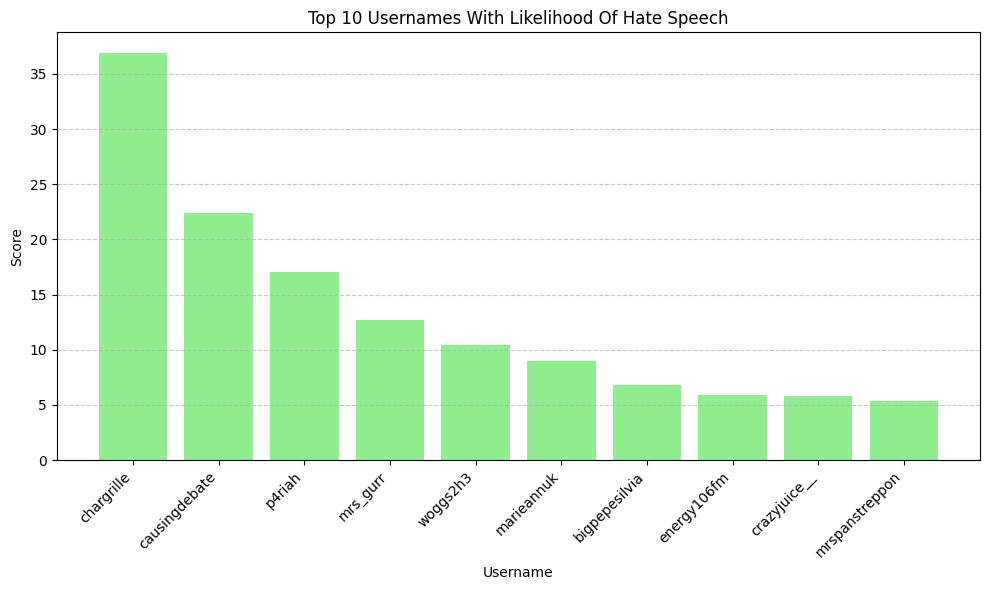

In [ ]:
import matplotlib.pyplot as plt
# Create a bar chart using Matplotlib
# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_10_df['user_name'], top_10_df['final_likelihood_score'], color='lightgreen')  # Using a named color
plt.xlabel('Username')
plt.ylabel('Score')
plt.title('Top 10 Usernames With Likelihood Of Hate Speech')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_10_usernames2.png')
# Show the plot
plt.show()

#### LLM score

In [ ]:
from langchain_community.llms import Ollama
import os
from langchain.llms import HuggingFaceHub
from langchain.chains import LLMChain, SimpleSequentialChain
from langchain.prompts import PromptTemplate
llm = Ollama(model="llama3")

In [ ]:
import re

def extract_first_digit(text):
    # Use regular expression to find the first digit in the string
    match = re.search(r'\d', text)

    if match:
        # Extract and return the first digit found
        return int(match.group())
    else:
        # If no digit found, return -1
        return -1

In [ ]:
def llm_score(tweets_text):
    template = f"I have a raw text that is composed of the tweets and replies of an account in Twitter. Your goal is to assess the offensiveness level of the given text on a scale from 0 to 10, where 0 indicates no offense at all, and 10 signifies extreme offensiveness. Provide only the corresponding number. The text is: {tweets_text}. Please help me to give an overall score to all of those sentences, from 0 to 10, where 0 is not offensive, prejudiced, violent, or harmful, and 10 is extremely offensive and dangerous. Instructions: 1. Read the sentences carefully. 2. Evaluate their general offensiveness level based on the provided scale. 3. Assign a numerical rating between 0 and 10 - a unique number representing all. Output this digit. Please give me only the number as an output, no letters."
    # Assuming res is the result of invoking the chain
    res = llm.invoke(template)
    print(res)
    # Extract the first digit from res
    first_digit = extract_first_digit(res)
    return first_digit

In [ ]:
with open('twitter_data.json', "r") as json_file:
    # Load the JSON data
    data = json.load(json_file)
usernames = []
scores = []
# Access the list of user data under the "users" key
user_list = data["users"]
for user_data in user_list:
    # if user_data.get('is_suspended') is not None:
        continue
    user_text = get_all_user_text(user_data)
    score = llm_score(user_text)
    scores.append(score)
    usernames.append(user_data['user_name'])
llm_scores_df = pd.DataFrame({'Username': usernames, 'LLM_Score': scores})